In [1]:
import keras, os, time
from __future__ import division
from __future__ import print_function
from cs_dae.models_def import build_mnist_model
from cs_dae.data import get_mnist_data
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

Using TensorFlow backend.


## Train / Load DAE


In [2]:
autoencoder = build_mnist_model()

In [4]:
#Get data 
x_train, x_test = get_mnist_data()
x_train_noisy = np.zeros(x_train.shape, dtype=np.float32)

#train
x_train_noisy[:10000] = x_train[:10000] + 0.25*np.random.normal(loc=0.0, scale=1.0, size=(10000,28,28,1)) 
x_train_noisy[10000:2*10000] = x_train[10000:2*10000] + 0.50*np.random.normal(loc=0.0, scale=1.0, size=(10000,28,28,1)) 
x_train_noisy[2*10000:3*10000] = x_train[2*10000:3*10000] + 0.75*np.random.normal(loc=0.0, scale=1.0, size=(10000,28,28,1)) 
x_train_noisy[3*10000:4*10000] = x_train[3*10000:4*10000] + 1.0*np.random.normal(loc=0.0, scale=1.0, size=(10000,28,28,1)) 
x_train_noisy[4*10000:5*10000] = x_train[4*10000:5*10000] + 1.25*np.random.normal(loc=0.0, scale=1.0, size=(10000,28,28,1))

x_test_noisy = x_test + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

In [7]:
%%capture training
autoencoder.compile(optimizer=keras.optimizers.Adam(0.01), loss='mean_squared_error')
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),)
model_json = autoencoder.to_json()
with open("mnist_autoencoder_full", "w") as json_file:
    json_file.write(model_json)
    # serialize weights to HDF5
    autoencoder.save_weights("mnist_autoencoder_full_weights")
    print("Saved model to disk")

In [5]:
#Load Model
#json_file = open('mnist_autoencoder_full', 'r')
#loaded_model_json = json_file.read()
#json_file.close()
#autoencoder.load_weights("mnist_autoencoder_full_weights")
#print("Loaded model from disk")

Loaded model from disk


## Test DAE on Noisy Images

In [8]:
x_preds = autoencoder.predict(x_test_noisy)

## Original Test Images

[4924 3271 3123 3146 7247 2678 3509 8478 6760 2170]


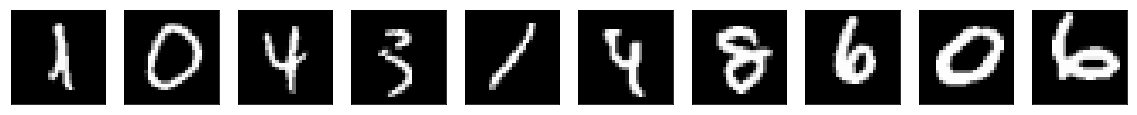

In [9]:
x_vis = np.random.choice(range(10000), size=10, replace=False)
print(x_vis)
plt.figure(figsize=(20, 2))
ctr =1
for i in x_vis:
    ax = plt.subplot(1, 10, ctr)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ctr+=1
plt.show()

## Noisy Test Images

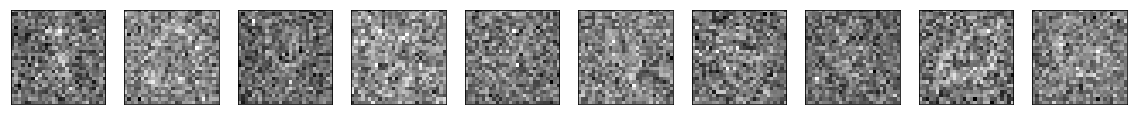

In [10]:
plt.figure(figsize=(20, 2))
ctr =1
for i in x_vis:
    ax = plt.subplot(1, 10, ctr)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ctr+=1
plt.show()

## Denoised Test Images

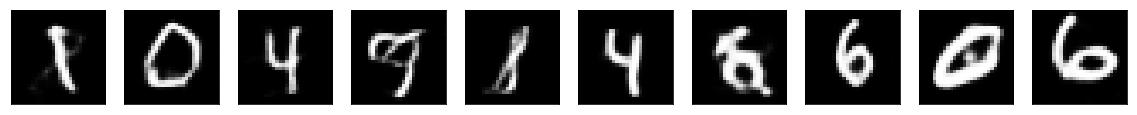

In [11]:
plt.figure(figsize=(20, 2))
ctr =1
for i in x_vis:
    ax = plt.subplot(1, 10, ctr)
    plt.imshow(x_preds[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ctr+=1
plt.show()

## Compressive Sensing: No Noise


In [16]:
A = (np.random.normal(0, 1/np.sqrt(100), (100, 784)))
y = np.zeros((10000,100))
for i in range(10000):
    y[i] = np.dot(A, x_test[i].flatten()) 
    

## Algorithm 1: IPT

Test Image Name: 8620.jpg


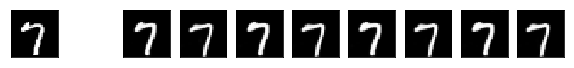

Test Image Name: 5650.jpg


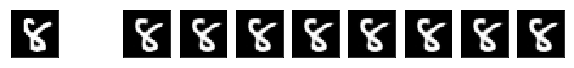

Test Image Name: 8698.jpg


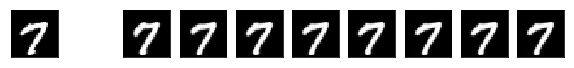

Test Image Name: 908.jpg


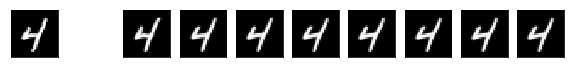

Test Image Name: 5765.jpg


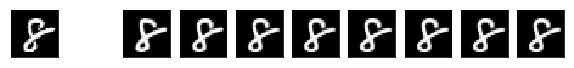

Test Image Name: 6784.jpg


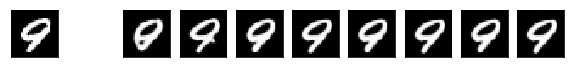

Test Image Name: 3587.jpg


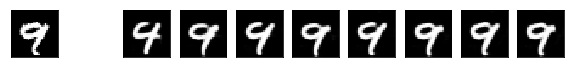

Test Image Name: 541.jpg


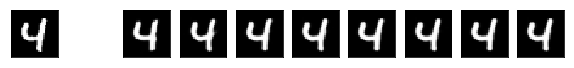

Test Image Name: 7866.jpg


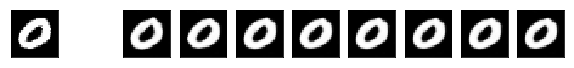

Test Image Name: 2891.jpg


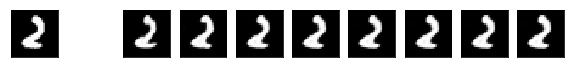

Test Image Name: 7938.jpg


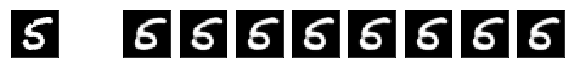

Test Image Name: 5279.jpg


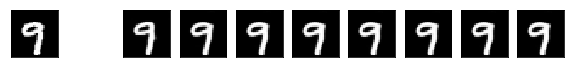

Test Image Name: 1709.jpg


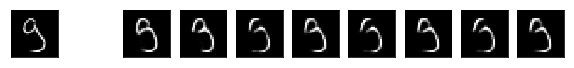

Test Image Name: 9437.jpg


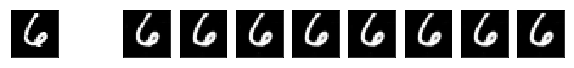

Test Image Name: 5918.jpg


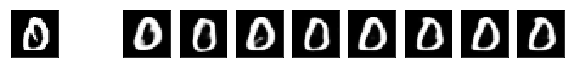

Test Image Name: 652.jpg


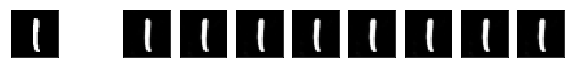

Test Image Name: 2956.jpg


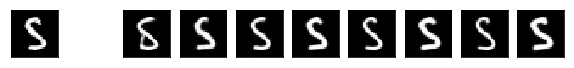

Test Image Name: 3821.jpg


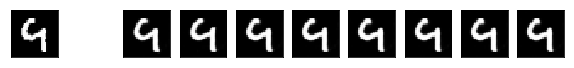

Test Image Name: 203.jpg


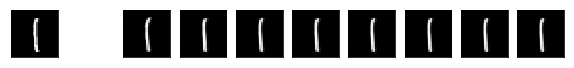

Test Image Name: 7140.jpg


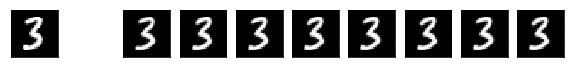

Test Image Name: 22.jpg


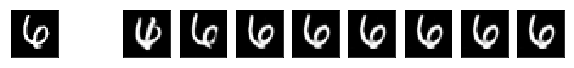

Test Image Name: 8818.jpg


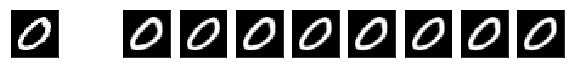

Test Image Name: 5084.jpg


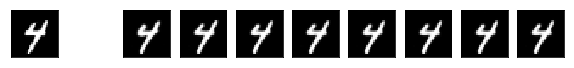

Test Image Name: 4443.jpg


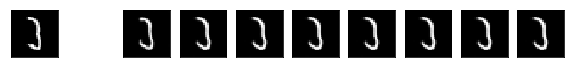

Test Image Name: 6588.jpg


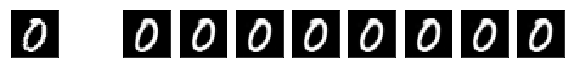

Test Image Name: 3206.jpg


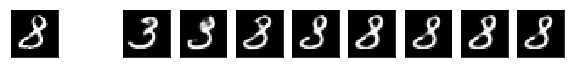

Test Image Name: 9814.jpg


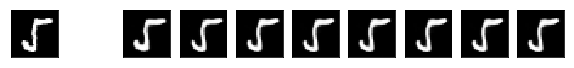

Test Image Name: 4144.jpg


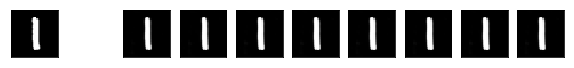

Test Image Name: 8415.jpg


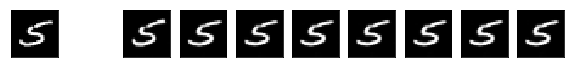

Test Image Name: 9618.jpg


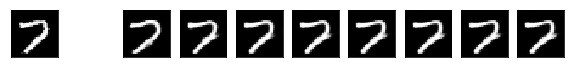

Test Image Name: 8923.jpg


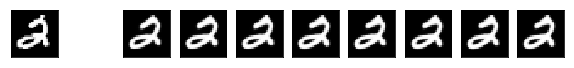

Test Image Name: 5028.jpg


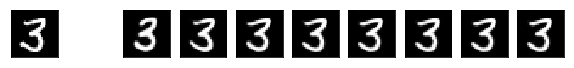

Test Image Name: 4547.jpg


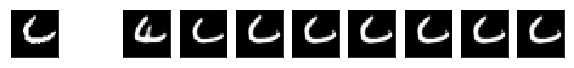

Test Image Name: 3602.jpg


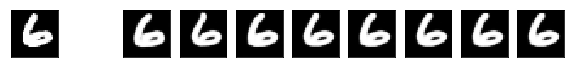

Test Image Name: 25.jpg


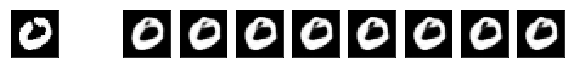

Test Image Name: 2616.jpg


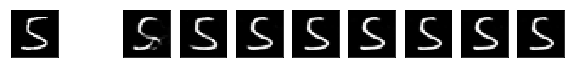

Test Image Name: 173.jpg


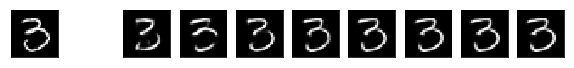

Test Image Name: 2397.jpg


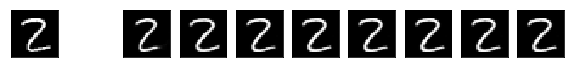

Test Image Name: 6742.jpg


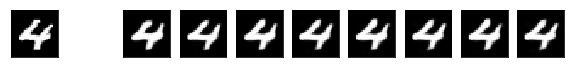

Test Image Name: 9931.jpg


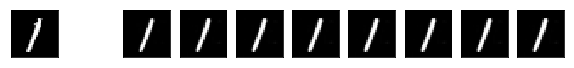

Test Image Name: 5127.jpg


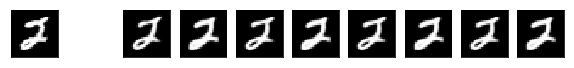

Test Image Name: 2627.jpg


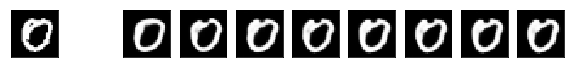

Test Image Name: 3409.jpg


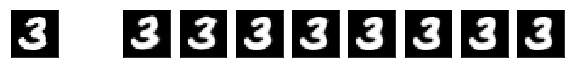

Test Image Name: 6852.jpg


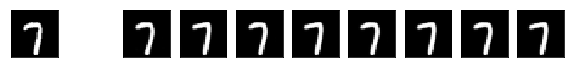

Test Image Name: 8998.jpg


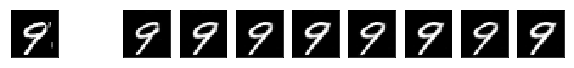

Test Image Name: 2426.jpg


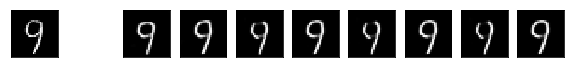

Test Image Name: 6967.jpg


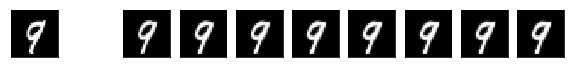

Test Image Name: 4288.jpg


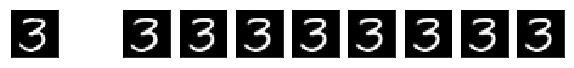

Test Image Name: 4414.jpg


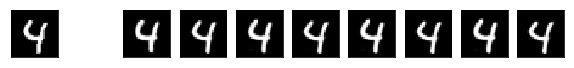

Test Image Name: 3041.jpg


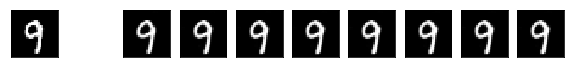

Test Image Name: 8021.jpg


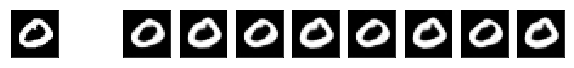

Test Image Name: 793.jpg


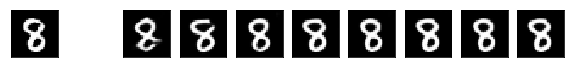

Test Image Name: 5373.jpg


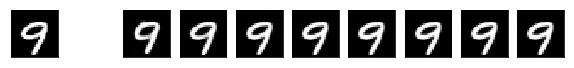

Test Image Name: 7137.jpg


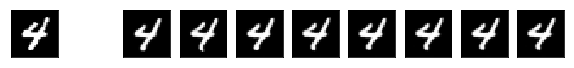

Test Image Name: 6577.jpg


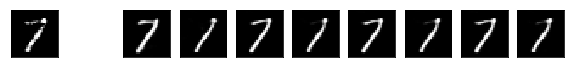

Test Image Name: 8549.jpg


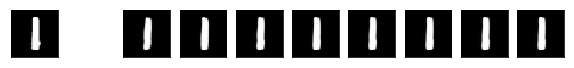

Test Image Name: 1895.jpg


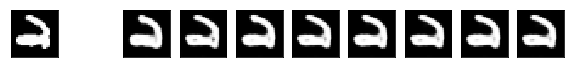

Test Image Name: 5532.jpg


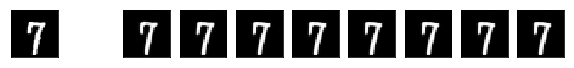

Test Image Name: 7368.jpg


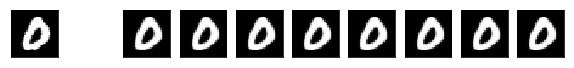

Test Image Name: 502.jpg


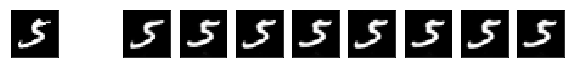

Test Image Name: 1381.jpg


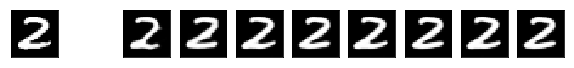

Test Image Name: 4516.jpg


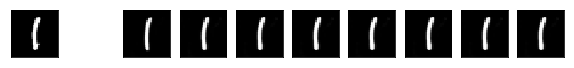

Test Image Name: 3486.jpg


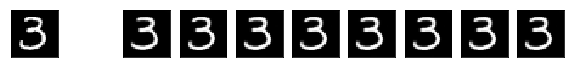

Test Image Name: 4025.jpg


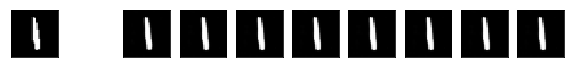

Test Image Name: 7112.jpg


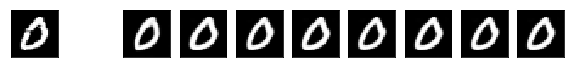

Test Image Name: 6004.jpg


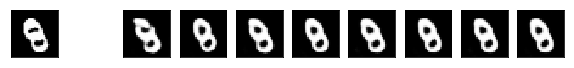

Test Image Name: 3430.jpg


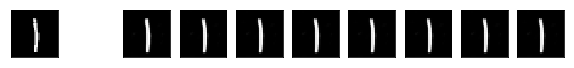

Test Image Name: 1875.jpg


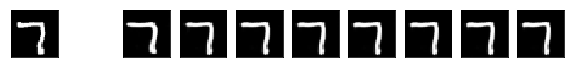

Test Image Name: 4650.jpg


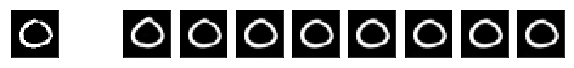

Test Image Name: 8780.jpg


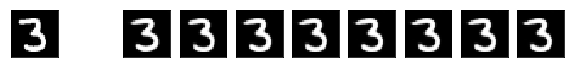

Test Image Name: 5168.jpg


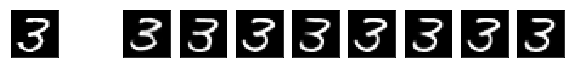

Test Image Name: 3819.jpg


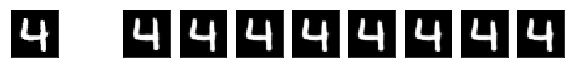

Test Image Name: 6622.jpg


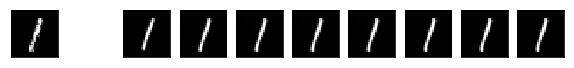

Test Image Name: 2691.jpg


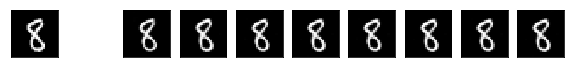

Test Image Name: 3127.jpg


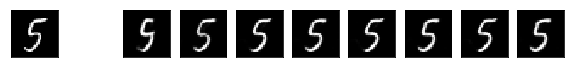

Test Image Name: 6702.jpg


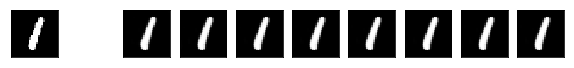

Test Image Name: 4659.jpg


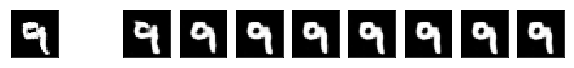

Test Image Name: 7328.jpg


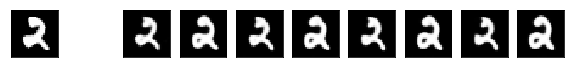

Test Image Name: 6963.jpg


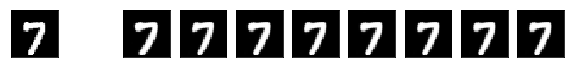

Test Image Name: 7446.jpg


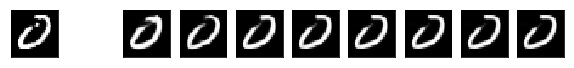

Test Image Name: 374.jpg


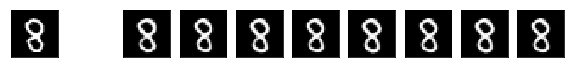

Test Image Name: 8179.jpg


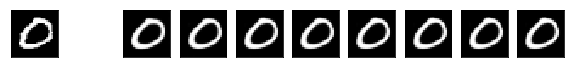

Test Image Name: 9155.jpg


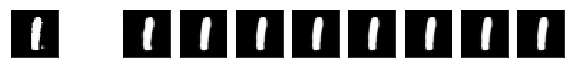

Test Image Name: 6730.jpg


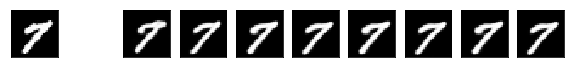

Test Image Name: 5488.jpg


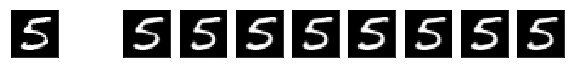

Test Image Name: 9434.jpg


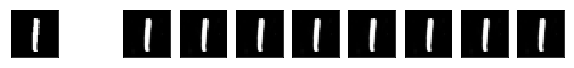

Test Image Name: 2216.jpg


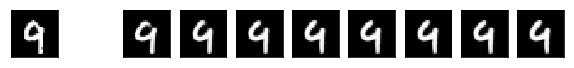

Test Image Name: 4453.jpg


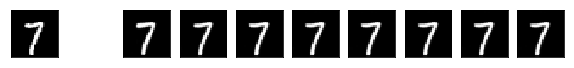

Test Image Name: 3163.jpg


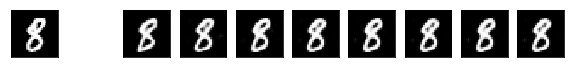

Test Image Name: 8320.jpg


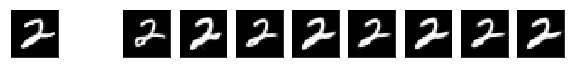

Test Image Name: 1716.jpg


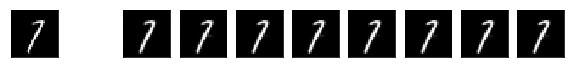

Test Image Name: 3746.jpg


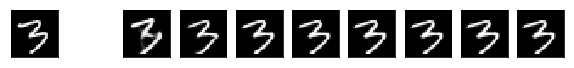

Test Image Name: 992.jpg


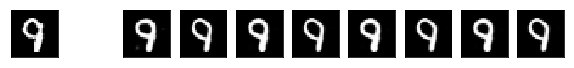

Test Image Name: 5364.jpg


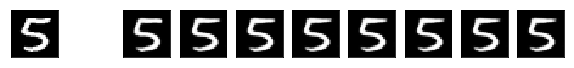

Test Image Name: 2618.jpg


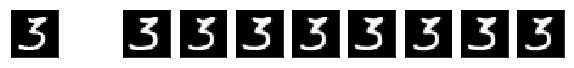

Test Image Name: 3028.jpg


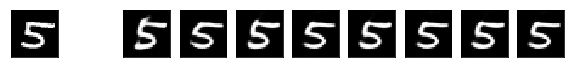

Test Image Name: 3521.jpg


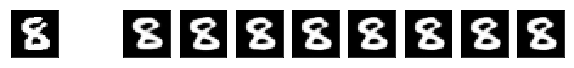

Test Image Name: 7405.jpg


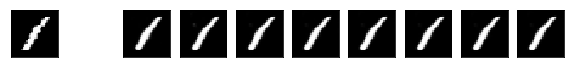

Test Image Name: 2137.jpg


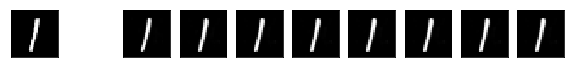

Test Image Name: 8618.jpg


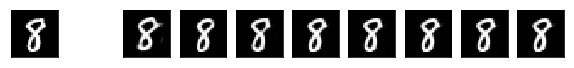

In [17]:
## WARNING: Visualization logic is hardcoded to the value 10, 
#          if you change iterations , visualization logic will need to be changed too
iterations = 10
num_rand_test=100
x_recovered = np.zeros((num_rand_test, 28,28,1))
A_T = A.T
ctr = 0
for i in np.random.choice(range(10000), size=num_rand_test, replace=False):
    plt.figure(figsize=(20, 2))
    print("Test Image Name: {}.jpg".format(i))
    x_t = np.random.normal(0., 1, (784,))
    for j in range(iterations):
        v_t = x_t - np.dot(A_T, np.dot(A,x_t) - y[i])
        x_t = autoencoder.predict(v_t.reshape(1,28,28,1))
        
        #Print original image
        if j == 0:
            ax = plt.subplot(1, 20, j / 1 + 1)
            plt.imshow(x_test[i].reshape(28,28))
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        
        #Show recovered image at iteration j
        if j % 1== 0 and j > 1:
            ax = plt.subplot(1, 20, j/1 + 1)
            plt.imshow(x_t.reshape(28,28))
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            
        x_t = x_t.reshape((784,))
    
    x_recovered[ctr] = x_t.reshape((28,28,1))
    ctr+=1
    
    plt.show() 

## Compressive Sensing: With Noise


In [19]:
A = (np.random.normal(0, 1/np.sqrt(100), (100, 784)))
y = np.zeros((10000,100))
for i in range(10000):
    y[i] = np.dot(A, x_test[i].flatten()) +  np.random.normal(loc=0.0, scale=1.0, size=100)

## Algorithm 1: IPT

Test Image Name: 4068.jpg


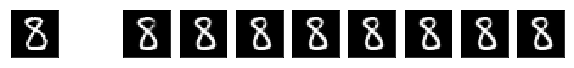

Test Image Name: 7144.jpg


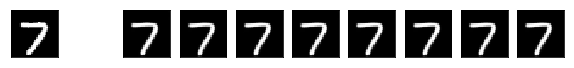

Test Image Name: 2096.jpg


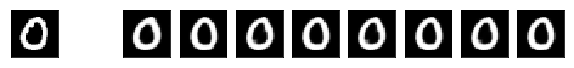

Test Image Name: 1000.jpg


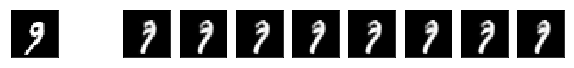

Test Image Name: 5564.jpg


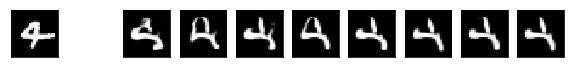

Test Image Name: 6233.jpg


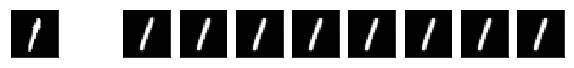

Test Image Name: 7023.jpg


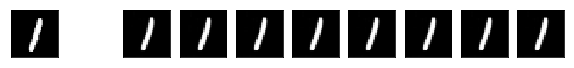

Test Image Name: 8144.jpg


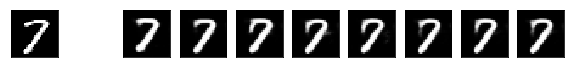

Test Image Name: 8939.jpg


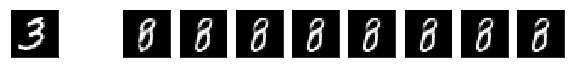

Test Image Name: 9841.jpg


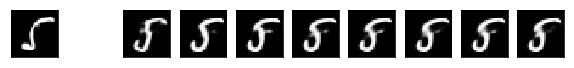

Test Image Name: 3398.jpg


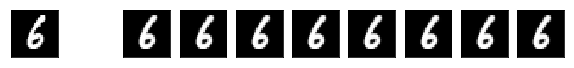

Test Image Name: 8920.jpg


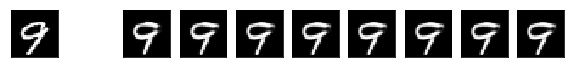

Test Image Name: 782.jpg


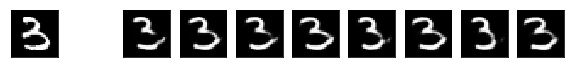

Test Image Name: 8409.jpg


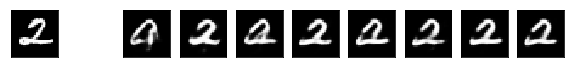

Test Image Name: 8720.jpg


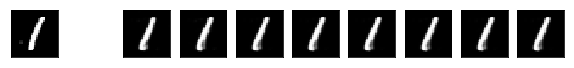

Test Image Name: 7156.jpg


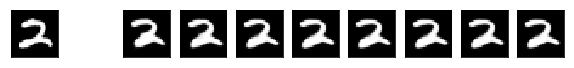

Test Image Name: 5859.jpg


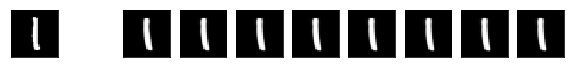

Test Image Name: 3160.jpg


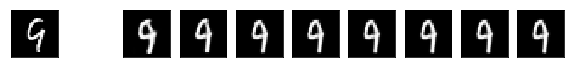

Test Image Name: 4141.jpg


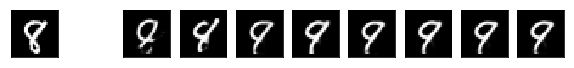

Test Image Name: 8090.jpg


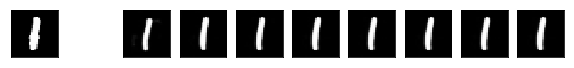

Test Image Name: 1388.jpg


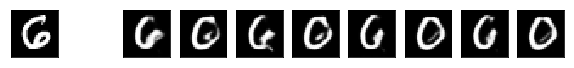

Test Image Name: 167.jpg


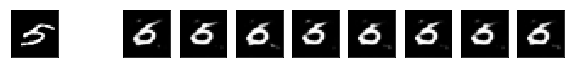

Test Image Name: 9930.jpg


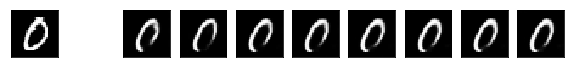

Test Image Name: 7945.jpg


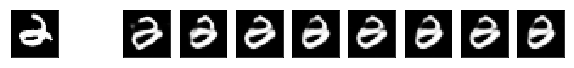

Test Image Name: 1398.jpg


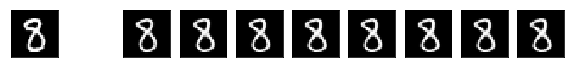

Test Image Name: 6513.jpg


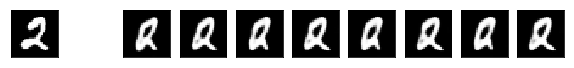

Test Image Name: 534.jpg


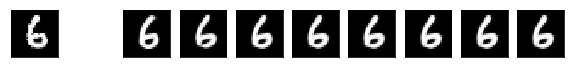

Test Image Name: 2012.jpg


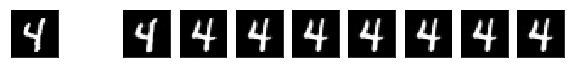

Test Image Name: 8185.jpg


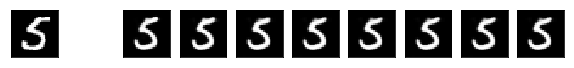

Test Image Name: 9899.jpg


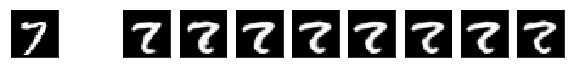

Test Image Name: 8494.jpg


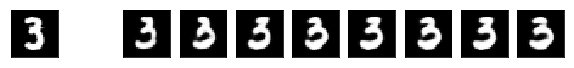

Test Image Name: 8713.jpg


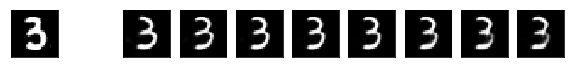

Test Image Name: 4248.jpg


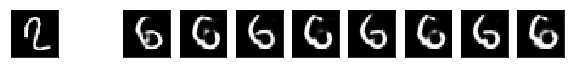

Test Image Name: 2373.jpg


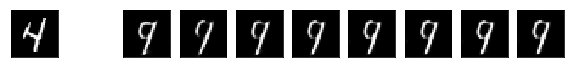

Test Image Name: 1567.jpg


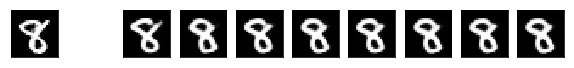

Test Image Name: 270.jpg


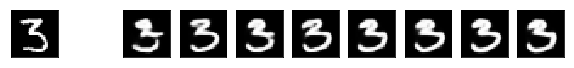

Test Image Name: 462.jpg


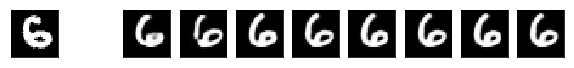

Test Image Name: 6838.jpg


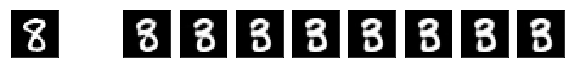

Test Image Name: 1548.jpg


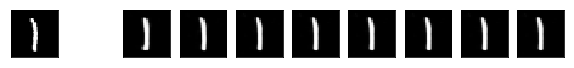

Test Image Name: 3804.jpg


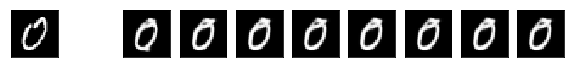

Test Image Name: 8030.jpg


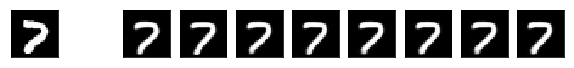

Test Image Name: 9447.jpg


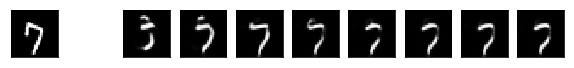

Test Image Name: 1257.jpg


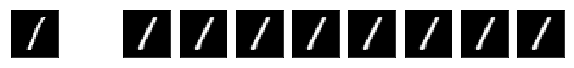

Test Image Name: 9119.jpg


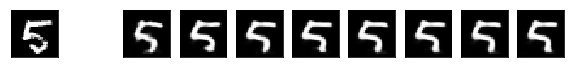

Test Image Name: 2964.jpg


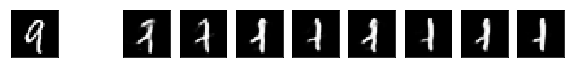

Test Image Name: 9003.jpg


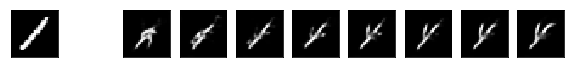

Test Image Name: 3191.jpg


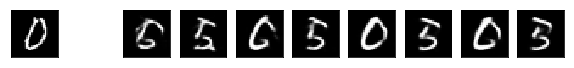

Test Image Name: 2590.jpg


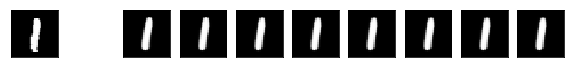

Test Image Name: 3581.jpg


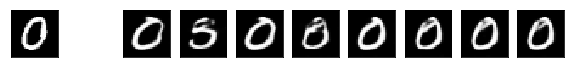

Test Image Name: 9057.jpg


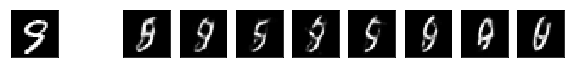

Test Image Name: 8627.jpg


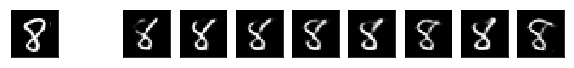

Test Image Name: 9217.jpg


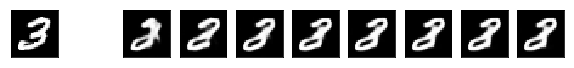

Test Image Name: 5270.jpg


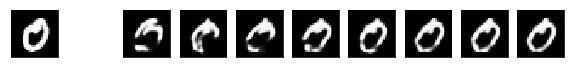

Test Image Name: 7042.jpg


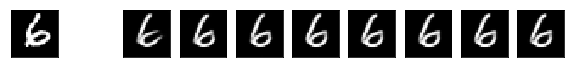

Test Image Name: 5445.jpg


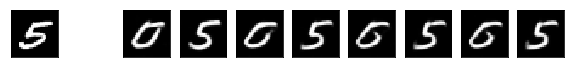

Test Image Name: 686.jpg


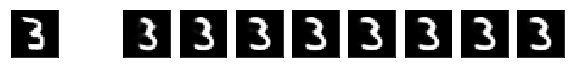

Test Image Name: 2408.jpg


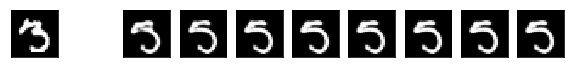

Test Image Name: 5238.jpg


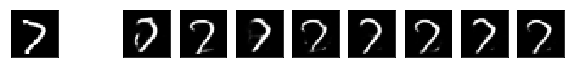

Test Image Name: 3693.jpg


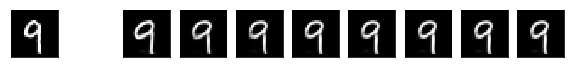

Test Image Name: 8850.jpg


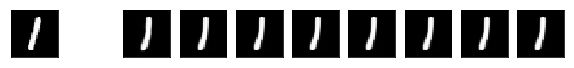

Test Image Name: 8772.jpg


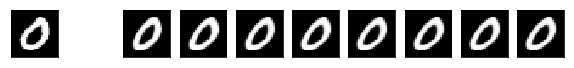

Test Image Name: 8959.jpg


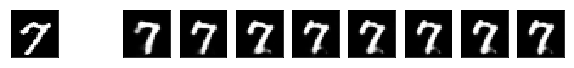

Test Image Name: 6877.jpg


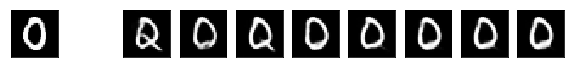

Test Image Name: 76.jpg


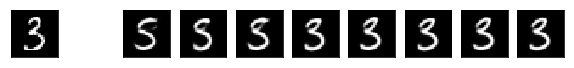

Test Image Name: 9659.jpg


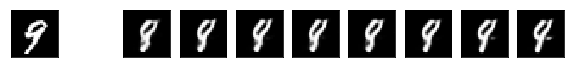

Test Image Name: 2873.jpg


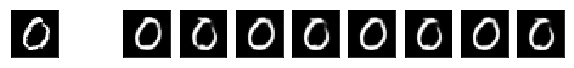

Test Image Name: 2156.jpg


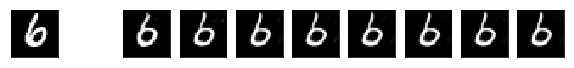

Test Image Name: 456.jpg


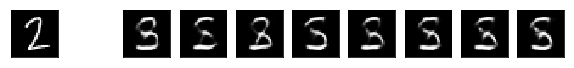

Test Image Name: 4316.jpg


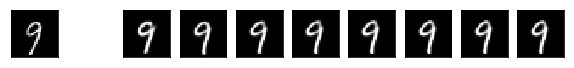

Test Image Name: 2549.jpg


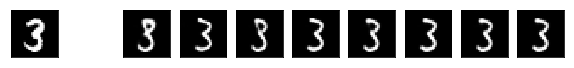

Test Image Name: 5314.jpg


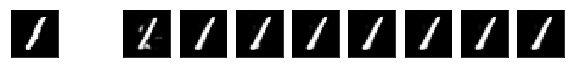

Test Image Name: 4143.jpg


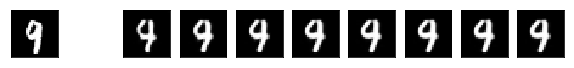

Test Image Name: 8210.jpg


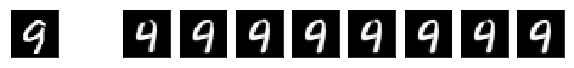

Test Image Name: 2999.jpg


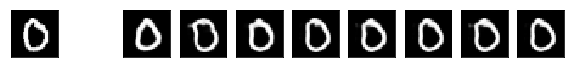

Test Image Name: 3902.jpg


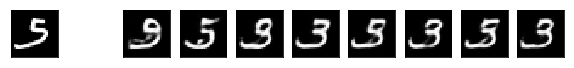

Test Image Name: 8930.jpg


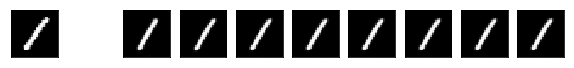

Test Image Name: 6600.jpg


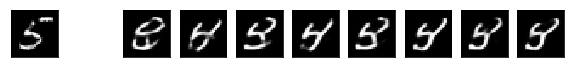

Test Image Name: 9412.jpg


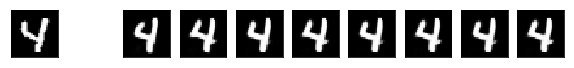

Test Image Name: 8123.jpg


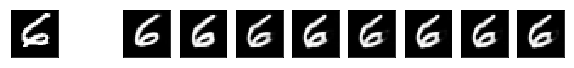

Test Image Name: 2395.jpg


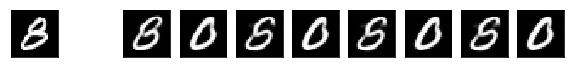

Test Image Name: 9198.jpg


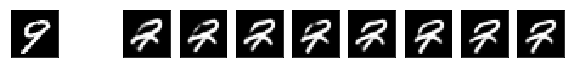

Test Image Name: 3026.jpg


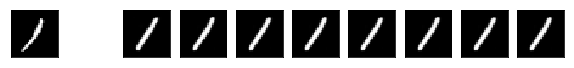

Test Image Name: 5626.jpg


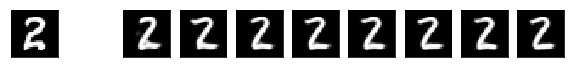

Test Image Name: 1706.jpg


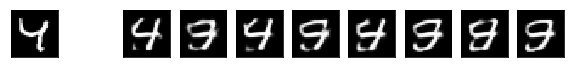

Test Image Name: 535.jpg


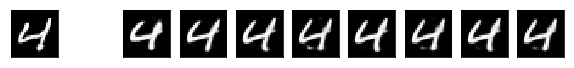

Test Image Name: 9389.jpg


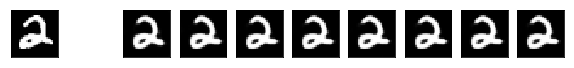

Test Image Name: 8847.jpg


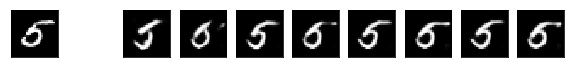

Test Image Name: 1159.jpg


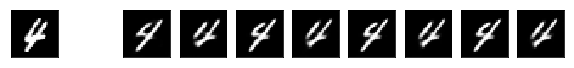

Test Image Name: 8220.jpg


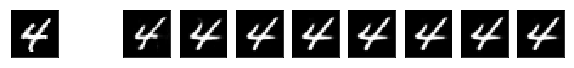

Test Image Name: 2250.jpg


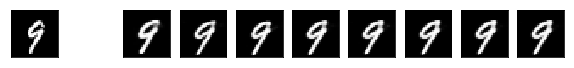

Test Image Name: 6030.jpg


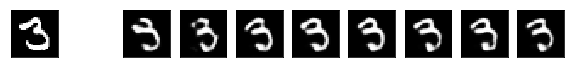

Test Image Name: 1896.jpg


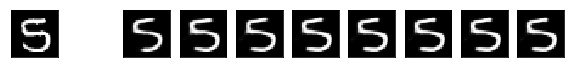

Test Image Name: 243.jpg


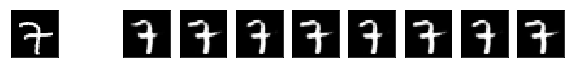

Test Image Name: 9755.jpg


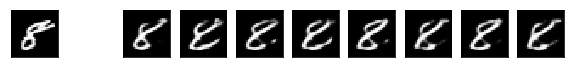

Test Image Name: 8603.jpg


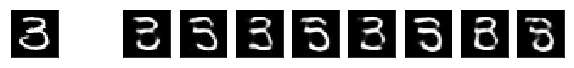

Test Image Name: 4254.jpg


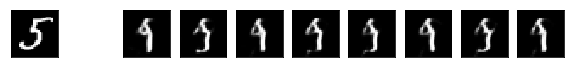

Test Image Name: 5412.jpg


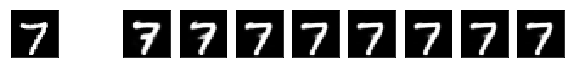

Test Image Name: 9858.jpg


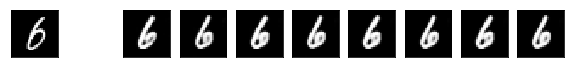

Test Image Name: 8866.jpg


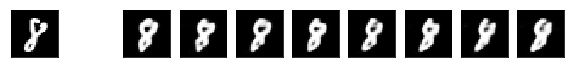

Test Image Name: 1736.jpg


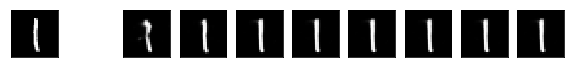

In [20]:
## WARNING: Visualization logic is hardcoded to the value 10, 
#          if you change iterations , visualization logic will need to be changed too
iterations = 10
num_rand_test=100
x_recovered = np.zeros((num_rand_test, 28,28,1))
A_T = A.T
ctr = 0
for i in np.random.choice(range(10000), size=num_rand_test, replace=False):
    plt.figure(figsize=(20, 2))
    print("Test Image Name: {}.jpg".format(i))
    x_t = np.random.normal(0., 1, (784,))
    for j in range(iterations):
        v_t = x_t - np.dot(A_T, np.dot(A,x_t) - y[i])
        x_t = autoencoder.predict(v_t.reshape(1,28,28,1))
        
        #Print original image
        if j == 0:
            ax = plt.subplot(1, 20, j / 1 + 1)
            plt.imshow(x_test[i].reshape(28,28))
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        
        #Show recovered image at iteration j
        if j % 1== 0 and j > 1:
            ax = plt.subplot(1, 20, j/1 + 1)
            plt.imshow(x_t.reshape(28,28))
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            
        x_t = x_t.reshape((784,))
    
    x_recovered[ctr] = x_t.reshape((28,28,1))
    ctr+=1
    
    plt.show() 